# Keras Vs Pytorch

In this lecture, we will explore two widely-used deep learning frameworks: [Keras](https://keras.io/) and [Pytorch](https://pytorch.org/). While both are powerful tools for building neural networks, they offer
distinct features and approaches that make them suitable for different tasks and user preferences.

Our task today involves implementing a Multi-Layer Perceptron (MLP) with one hidden layer to tackle the MNIST digit classification problem. MNIST is a well-known
dataset of handwritten digits, making it an ideal choice for demonstrating classification tasks due to its simplicity and availability.<br><br>


Following are some differences between Keras and Pytorch:

|                 | **PyTorch** | **Keras**|
|-----------------|-------------|----------|
| **Target Audience**        | Researchers, experienced developers with need for flexibility              | Beginners, quick prototypers, industry practitioners|
| **Flexibility**            | High; dynamic computation graph allows for custom operations and research  | Moderate; pre-built layers offer speed but limit some customization|
| **Community & Ecosystem**  | Strong research community support, backed by Facebook (Meta)               | Extensive enterprise adoption, part of TensorFlow ecosystem, backed by Google|
| **Deployment Capabilities**| Supports model exporting for integration into production systems           | Leverages TensorFlow's ecosystem for scalable and efficient deployment|
| **Documentation & Resources** | Advanced materials and documentation for experienced developers         | Beginner-friendly resources and tutorials|
| **Use Cases**                | Experimental projects, cutting-edge research, complex models             | Industry applications, rapid prototyping, enterprise use|
| **Scalability**|Handles large-scale deployments with dynamic computation graph performance | Efficient scaling via TensorFlow's distributed training capabilities|



## Keras

In [1]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

num_classes = 10
input_shape = 28*28

# Flatten images
x_train = x_train.reshape((-1, 28*28))
x_test  = x_test.reshape((-1, 28*28))

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test  = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train_onehot = keras.utils.to_categorical(y_train, num_classes) # one-hot encoding
y_test_onehot  = keras.utils.to_categorical(y_test, num_classes)  # one-hot encoding

print("y_train shape:", y_train_onehot.shape)
print("y_train:", y_train[0], y_train_onehot[0])

x_train shape: (60000, 784)
60000 train samples
10000 test samples
y_train shape: (60000, 10)
y_train: 5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [25]:
# define the model with One Hidden Layer
model = keras.Sequential(
    [
        # Input layer: accept input with (batch_szie, 784). Array of lenght 784
        keras.Input(shape=(input_shape,), name="Input layer"),
        # Dense layer with 10 neurons
        layers.Dense(10, activation="relu", name="hidden_layer"),
        # Output layer with 10 neurons (remebere we have 10 classes !)
        layers.Dense(num_classes, activation="softmax", name="output_layer"),
    ]
)

# or you can just 'add' some layers
# model = Sequential()
# mode.add(keras.Input(shape=input_shape))
# model.add(layers.Dense(10, activation="relu"))
# model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)                 │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 'compile' the model using the SGD algorithm and the Categorical Crossentropy Loss
# adding the Accuracy metric
# Cross entropy measures the difference between the predicted probability and the true probability.
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
# Train the model using the Training set for 10 epochs
history = model.fit(x_train, y_train_onehot, batch_size=32, epochs=10, verbose=True)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5911 - loss: 1.3341
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8798 - loss: 0.4371
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8964 - loss: 0.3609
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9067 - loss: 0.3274
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9116 - loss: 0.3124
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9129 - loss: 0.3017
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9171 - loss: 0.2927
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9189 - loss: 0.2870
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9216 - loss: 0.2798
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9232 - loss: 0.2711


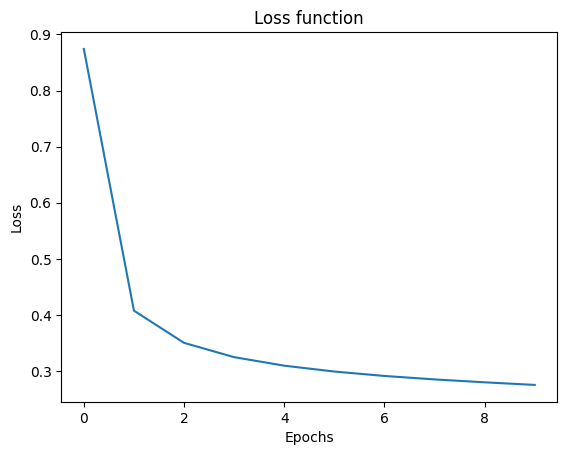

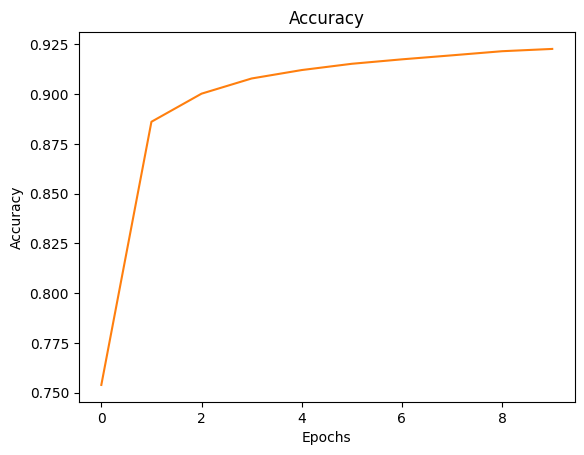

In [6]:
# plot the Accuracy and the Training Loss
plt.plot(history.history['loss'])
plt.title("Loss function")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.plot(history.history['accuracy'], color='tab:orange')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [7]:
# Now we evaluate the model using the testing set
score = model.evaluate(x_test, y_test_onehot)

print("Test accuracy:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.3059
Test accuracy: 0.9230999946594238


In [35]:
# This is how to make inference
preds = model.predict(x_test)
preds_labels = np.argmax(preds, 1)

print("Prediction shapes:", preds.shape, preds_labels.shape)
print("Predicted label:", preds_labels[0], preds[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction shapes: (10000, 10) (10000,)
Predicted label: 0 [0.19162974 0.06551789 0.14114067 0.04713339 0.06312098 0.14916737
 0.06632626 0.11095288 0.06578122 0.09922966]


In [8]:
# cool way to preprocess data using Keras !
(x_train_test, _), _ = keras.datasets.mnist.load_data()

flat_and_normalize = keras.Sequential([
    keras.Input(shape=(28,28)),
    layers.Rescaling(1./255),
    layers.Reshape((28*28,)),
])

_norm_dst = flat_and_normalize(x_train_test)

print(x_train.shape)
print(_norm_dst.shape)

(60000, 784)
(60000, 784)


## Pytorch

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [10]:
# We are going to use the same dataset as before
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

print("y_train shape:", y_train_onehot.shape)
print("y_train:", y_train[0], y_train_onehot[0])

x_train shape: (60000, 784)
60000 train samples
10000 test samples
y_train shape: (60000, 10)
y_train: 5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
# Define the Dataset class to handle images and labels
class MyMnistDataset(Dataset):
  def __init__(self, images, labels):
    assert len(images) == len(labels)

    self.images = images
    self.labels  = labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    _selected_img = torch.tensor(self.images[idx])
    _selected_lab = torch.tensor(self.labels[idx])

    return _selected_img, _selected_lab

In [12]:
# Create the training and testing datasets
train_dataset = MyMnistDataset(x_train, y_train_onehot)
test_dataset = MyMnistDataset(x_test, y_test_onehot)

In [13]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [14]:
# Create the training and testing Dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

In [15]:
for _img, _lab in train_loader:
  print(_img.shape)
  print(_lab.shape)
  break

torch.Size([32, 784])
torch.Size([32, 10])


In [16]:
# Choose device to use
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Apple MPS device for computation.")
elif torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA device for computation.")
else:
    device = torch.device("cpu")
    print("Using CPU for computation.")

Using CPU for computation.


In [17]:
# Define MLP model
class MLPModel(nn.Module):
    """
    A Fully Connected Neural Network (MLP) for classifying MNIST handwritten digits.
    This model consists of two hidden layers with ReLU activation and dropout for regularization.
    It processes flattened 28x28 grayscale images and outputs logits for 10 digit classes.
    """

    def __init__(self):
        """
        Initialize the MNISTModel.

        Sets up the layers of the MLP including input, hidden, dropout, and output layers.
        """
        # initialize the base class (nn.Module) to inherit its methods and properties
        super(MLPModel, self).__init__()

        # Define activation functions
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

        # first fully connected layer: 28*28 or 784 input features, 10 output features
        self.hidden_layer = nn.Linear(28 * 28, 10)

        # output layer: 10 input features, 10 output features (number of classes)
        self.output_layer = nn.Linear(10, 10)

    def forward(self, x):
        """
        Define the forward pass of the MLP.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 1, 28, 28).

        Returns:
            torch.Tensor: Output logits of shape (batch_size, 10).
        """
        # pass through first fully connected layer
        x = self.hidden_layer(x)
        x = self.relu(x)

        # pass through output layer
        x = self.output_layer(x)
        x = self.softmax(x)

        # return the output logits of shape (batch_size, 10), representing class scores
        return x

In [18]:
# Create the model and send it to the selected device
model = MLPModel().to(device)
print(model)

MLPModel(
  (relu): ReLU()
  (softmax): Softmax(dim=None)
  (hidden_layer): Linear(in_features=784, out_features=10, bias=True)
  (output_layer): Linear(in_features=10, out_features=10, bias=True)
)


In [19]:
# Define the Loss Function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

In [20]:
# number of epochs to train the model
n_epochs = 10

model.train() # prepare the model for training

history = []
for epoch in range(n_epochs):
    # monitor training loss
    epoch_loss = []

    ###################
    # train the model #
    ###################
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(x)

        # calculate the loss
        loss = criterion(output, y)

        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # perform a single optimization step (parameter update)
        optimizer.step()

        # update running training loss
        epoch_loss.append(loss.item())

    # print training statistics
    # calculate average loss over an epoch
    epoch_loss = np.mean(epoch_loss)
    history.append(epoch_loss)

    print(f'Epoch: {epoch+1} \tTraining Loss: {epoch_loss:.6f}')

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 1 	Training Loss: 2.266097
Epoch: 2 	Training Loss: 1.999315
Epoch: 3 	Training Loss: 1.825074
Epoch: 4 	Training Loss: 1.765480
Epoch: 5 	Training Loss: 1.741948
Epoch: 6 	Training Loss: 1.730613
Epoch: 7 	Training Loss: 1.723694
Epoch: 8 	Training Loss: 1.718823
Epoch: 9 	Training Loss: 1.715247
Epoch: 10 	Training Loss: 1.712380


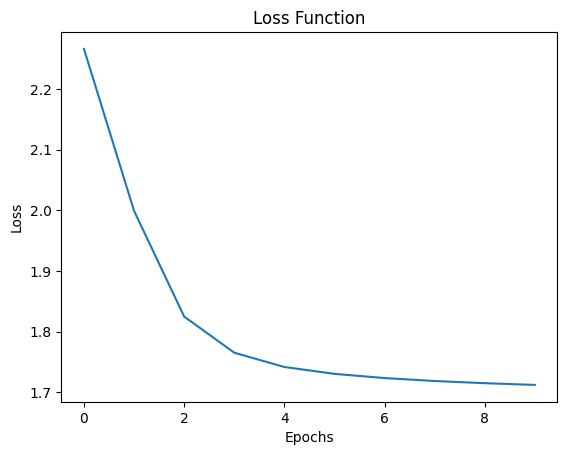

In [21]:
# Plot Loss Function over epochs
plt.plot(history)
plt.title("Loss Function")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [22]:
# Evaluate the model
model.eval() # prepare model for evaluation
accuracy = 0

# prevent computing gradients
with torch.no_grad():
  for x, target in test_loader:
    output = model(x)

    # compute the maximum on the second dimension (remember we have a batch size = 1)
    # and return a tuple: (values, indices)
    _, pred = torch.max(output, 1)
    _, target = torch.max(target, 1)

    accuracy += (pred == target).item()

accuracy = accuracy / len(y_test)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 76.38000000000001%
